In [ ]:
# This notebook run on Google Colab

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Kaggle Dataset + Rotten Tomatoes

In [ ]:
#Open file
rt_df = pd.read_csv("./movie_with_rottentomatoes_reviews.csv")
print(rt_df.info())
rt_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
 8   reviews           34886 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB
None


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,reviews
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",[]
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",[]
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",[]
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,[]
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,['[F]reaky and not a little psychedelic...']


2       23335
4         113
8          48
112        26
129        23
        ...  
1795        1
1885        1
3038        1
2209        1
3579        1
Name: reviews, Length: 2983, dtype: int64
66.8892965659577% of the samples do not have any review


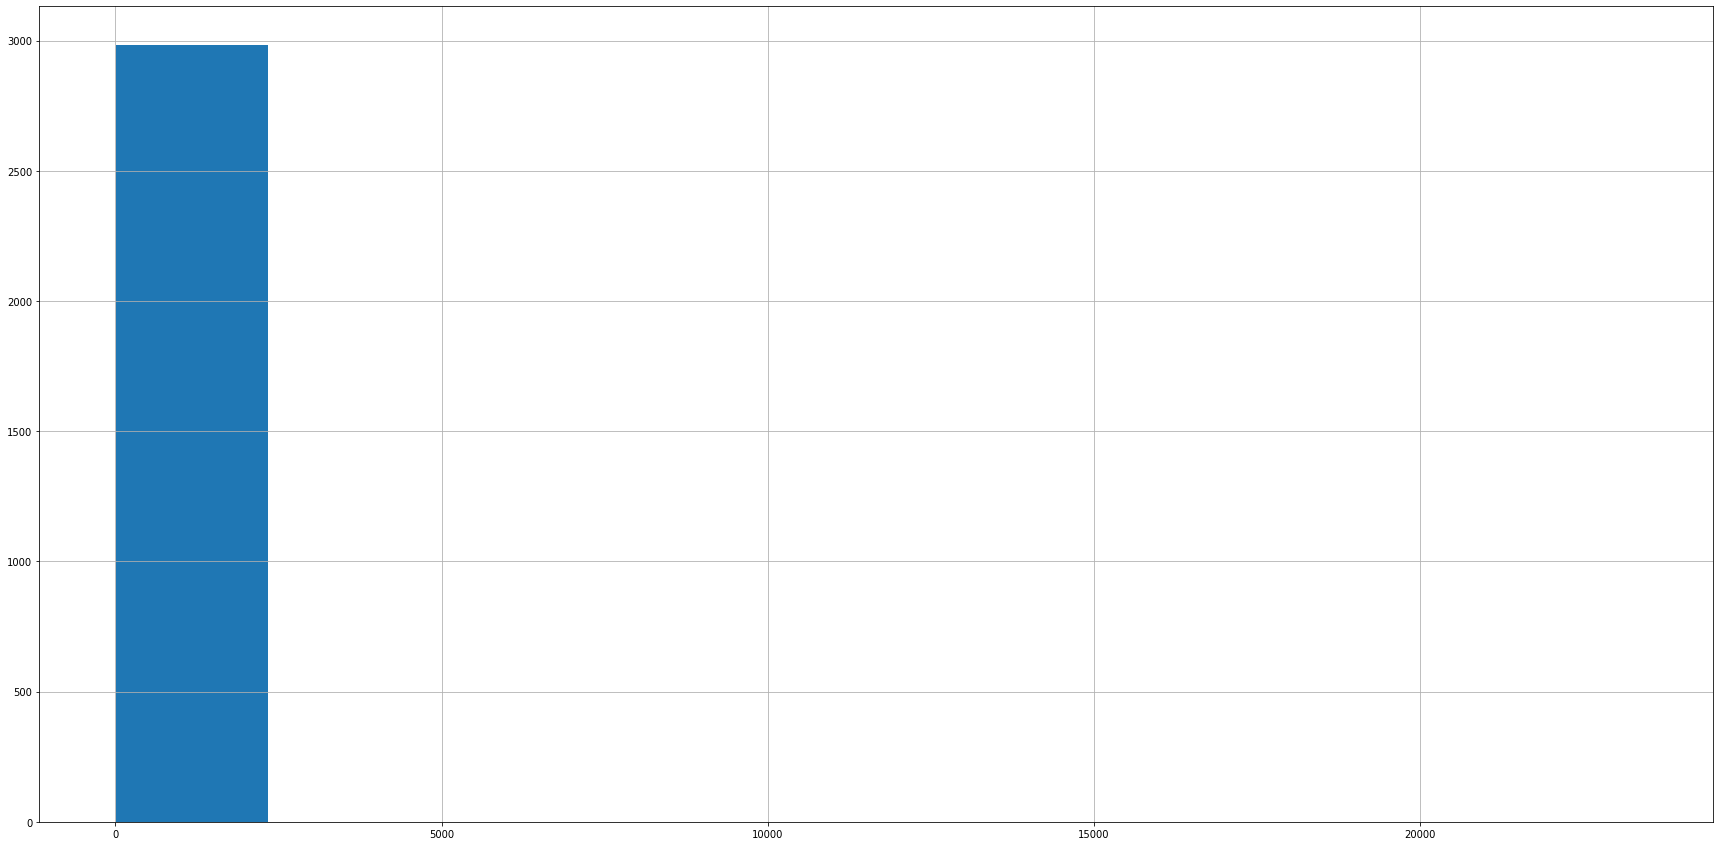

In [ ]:
#Value count on the length of the movie reviews, then plot the distribution 
print(rt_df['reviews'].map(len).value_counts())
print("{}% of the samples do not have any review".format(23335 / 34886 * 100))
rt_df['reviews'].map(len).value_counts().hist(figsize = (30,15))

In [ ]:
#remove movies with no reviews
empty_length = len(rt_df.loc[0, "reviews"])
rt_cleaned = rt_df[rt_df['reviews'].map(len) > empty_length]
print(rt_cleaned.info())
rt_cleaned.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 4 to 34884
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      11551 non-null  int64 
 1   Title             11551 non-null  object
 2   Origin/Ethnicity  11551 non-null  object
 3   Director          11551 non-null  object
 4   Cast              11309 non-null  object
 5   Genre             11551 non-null  object
 6   Wiki Page         11551 non-null  object
 7   Plot              11551 non-null  object
 8   reviews           11551 non-null  object
dtypes: int64(1), object(8)
memory usage: 902.4+ KB
None


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,reviews
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,['[F]reaky and not a little psychedelic...']
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...,['The film pays homage to the long history of ...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...,['One of the most remarkable cases of child-st...
28,1910,Frankenstein,American,J. Searle Dawley,"Augustus Phillips, Charles Stanton Ogle, Mary ...",unknown,https://en.wikipedia.org/wiki/Frankenstein_(19...,"Described as ""a liberal adaptation of Mrs. She...",['']
70,1914,Cinderella,American,James Kirkwood,"Mary Pickford, Owen Moore, Isobel Vernon",fantasy drama,https://en.wikipedia.org/wiki/Cinderella_(1914...,Cinderella is a kind young woman who lives wit...,['Some of the Tom and Jerry stuff goes a hair ...


In [ ]:
#Still remove movies with no reviews 
empty_length = len(rt_df.loc[28, "reviews"])
rt_cleaned = rt_cleaned[rt_cleaned['reviews'].map(len) > empty_length]
print(rt_cleaned.info())
rt_cleaned.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11438 entries, 4 to 34884
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      11438 non-null  int64 
 1   Title             11438 non-null  object
 2   Origin/Ethnicity  11438 non-null  object
 3   Director          11438 non-null  object
 4   Cast              11200 non-null  object
 5   Genre             11438 non-null  object
 6   Wiki Page         11438 non-null  object
 7   Plot              11438 non-null  object
 8   reviews           11438 non-null  object
dtypes: int64(1), object(8)
memory usage: 893.6+ KB
None


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,reviews
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,['[F]reaky and not a little psychedelic...']
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...,['The film pays homage to the long history of ...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...,['One of the most remarkable cases of child-st...
70,1914,Cinderella,American,James Kirkwood,"Mary Pickford, Owen Moore, Isobel Vernon",fantasy drama,https://en.wikipedia.org/wiki/Cinderella_(1914...,Cinderella is a kind young woman who lives wit...,['Some of the Tom and Jerry stuff goes a hair ...
83,1914,In the Land of the Head Hunters,American,Edward S. Curtis,NaN,documentary drama,https://en.wikipedia.org/wiki/In_the_Land_of_t...,The following plot synopsis was published in c...,"[""The storytelling is rudimentary but the imag..."


In [ ]:
#Check if any column contains NaN value
rt_cleaned.isna().sum()

Release Year          0
Title                 0
Origin/Ethnicity      0
Director              0
Cast                238
Genre                 0
Wiki Page             0
Plot                  0
reviews               0
dtype: int64

In [ ]:
rt_cleaned_nonan = rt_cleaned.dropna()
print(rt_cleaned_nonan.info())
rt_cleaned_nonan.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11200 entries, 16 to 34884
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      11200 non-null  int64 
 1   Title             11200 non-null  object
 2   Origin/Ethnicity  11200 non-null  object
 3   Director          11200 non-null  object
 4   Cast              11200 non-null  object
 5   Genre             11200 non-null  object
 6   Wiki Page         11200 non-null  object
 7   Plot              11200 non-null  object
 8   reviews           11200 non-null  object
dtypes: int64(1), object(8)
memory usage: 875.0+ KB
None


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,reviews
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...,['One of the most remarkable cases of child-st...
70,1914,Cinderella,American,James Kirkwood,"Mary Pickford, Owen Moore, Isobel Vernon",fantasy drama,https://en.wikipedia.org/wiki/Cinderella_(1914...,Cinderella is a kind young woman who lives wit...,['Some of the Tom and Jerry stuff goes a hair ...
91,1914,The Masquerader,American,Charlie Chaplin,"Charlie Chaplin, Fatty Arbuckle",comedy,https://en.wikipedia.org/wiki/The_Masquerader_...,The Masquerader is a comedy short whose plot r...,['It is a comedy that I enjoy for twelve minut...
93,1914,The New Janitor,American,Charlie Chaplin,"Charlie Chaplin, Jess Dandy, John T. Dillon",comedy,https://en.wikipedia.org/wiki/The_New_Janitor,"The hero, a janitor played by Chaplin, is fire...","[""'The New Janitor' is a silent short film by ..."
98,1914,The Rounders,American,Charlie Chaplin,"Charlie Chaplin, Fatty Arbuckle, Phyllis Allen",comedy,https://en.wikipedia.org/wiki/The_Rounders_(19...,A drunk reveller (Chaplin) returns home to a s...,"[""The Rounders is one of those utterly relaxed..."


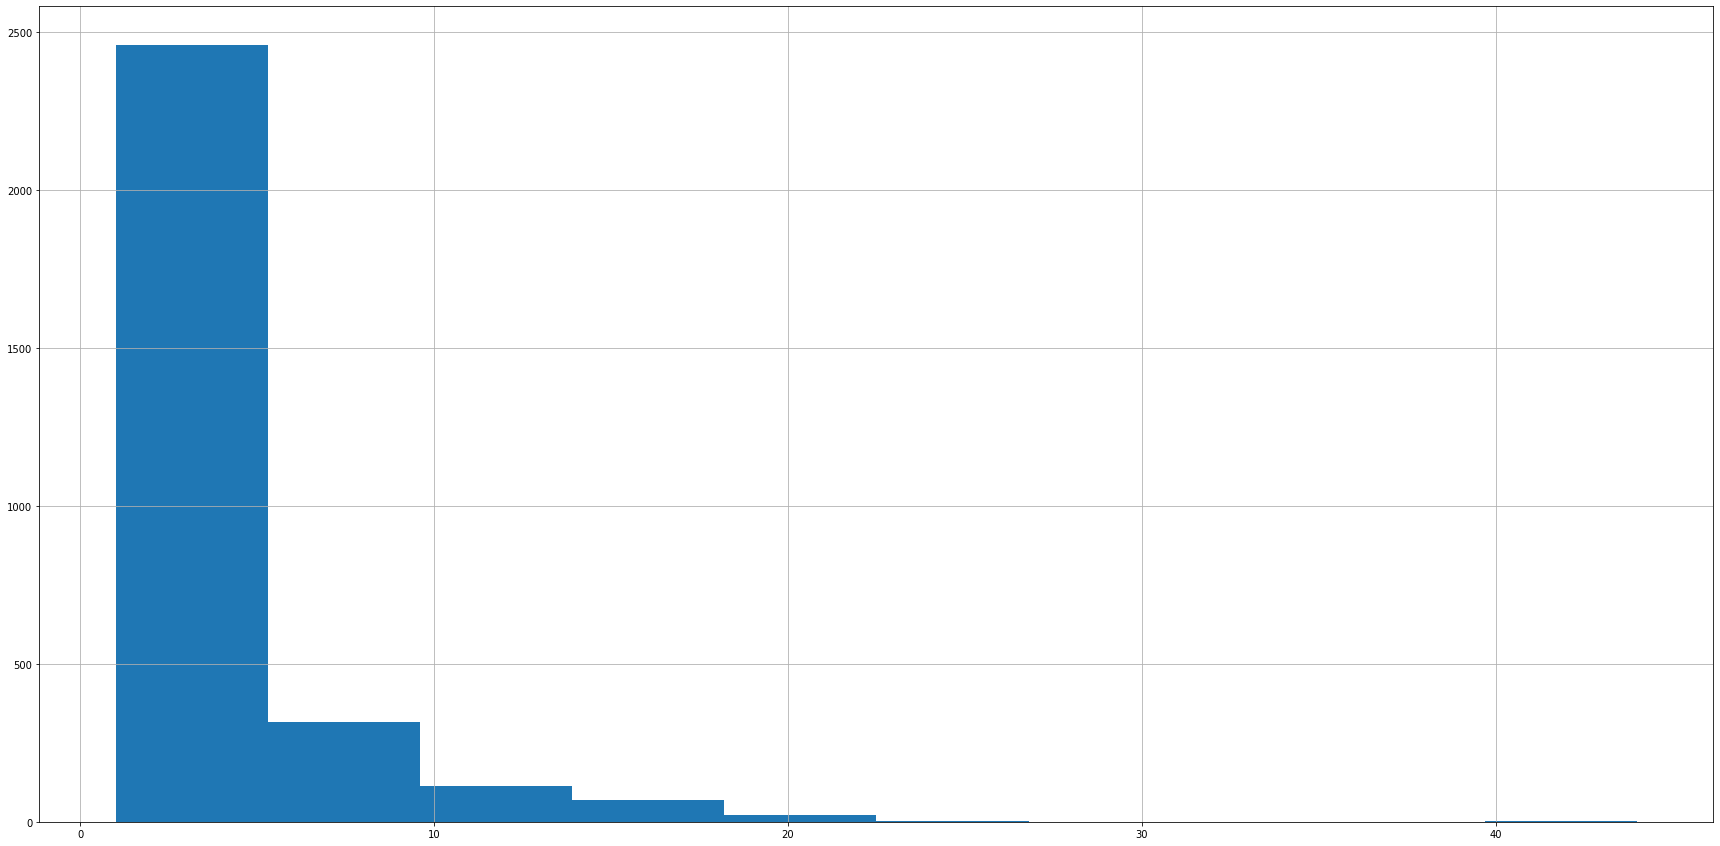

In [ ]:
rt_cleaned_nonan['reviews'].map(len).value_counts().hist(figsize = (30,15))

In [ ]:
rt_cleaned_nonan.to_csv("Movie_with_rt_review_cleaned" + ".csv", index=False)

#TMDB + Metacritics

In [ ]:
meta_df = pd.read_csv('2022-11-20movie_with_metacritic_reviews.csv')
print(meta_df.info())
meta_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
 4   reviews   4803 non-null   object
dtypes: int64(1), object(4)
memory usage: 187.7+ KB
None


,movie_id,title,cast,crew,reviews
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",['At the end of a decade defined by much belly...
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[]
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",['One of the great satisfactions of Spectre is...
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","['A cinematic, cultural and personal triumph, ..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",['The achievement of John Carter is that it ta...


2       1267
2769       5
3523       5
1617       5
892        4
        ... 
7275       1
3746       1
1864       1
2404       1
2122       1
Name: reviews, Length: 2821, dtype: int64
26.37934624193213% of the samples do not have any review


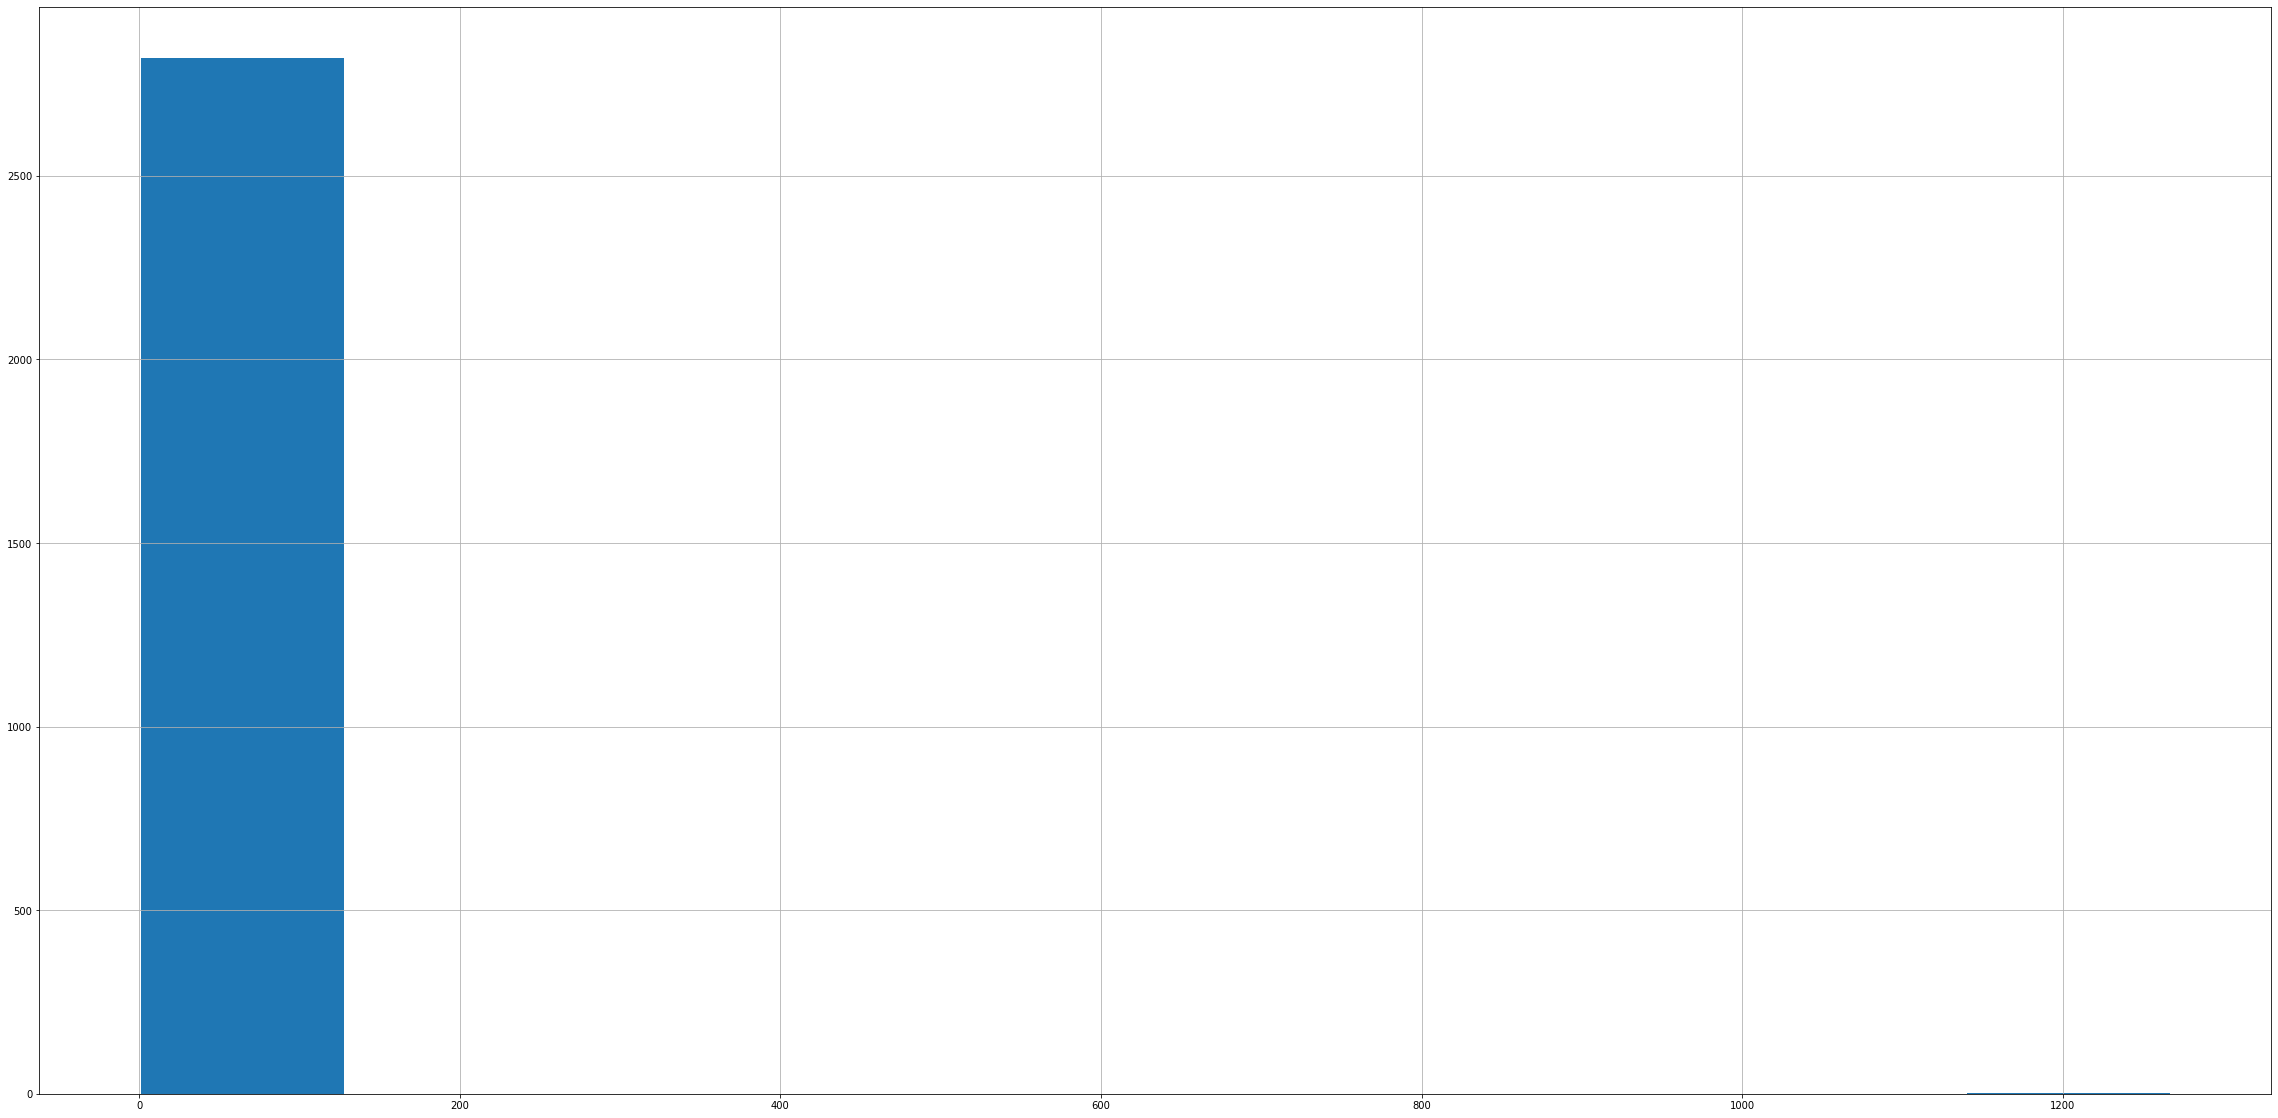

In [ ]:
print(meta_df['reviews'].map(len).value_counts())
print("{}% of the samples do not have any review".format(1267 / 4803 * 100))
meta_df['reviews'].map(len).value_counts().hist(figsize = (40,20))

In [ ]:
empty_length = len(meta_df.loc[1, "reviews"])
meta_cleaned = meta_df[meta_df['reviews'].map(len) > empty_length]
print(meta_cleaned.info())
meta_cleaned.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3536 non-null   int64 
 1   title     3536 non-null   object
 2   cast      3536 non-null   object
 3   crew      3536 non-null   object
 4   reviews   3536 non-null   object
dtypes: int64(1), object(4)
memory usage: 165.8+ KB
None


,movie_id,title,cast,crew,reviews
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",['At the end of a decade defined by much belly...
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",['One of the great satisfactions of Spectre is...
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","['A cinematic, cultural and personal triumph, ..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",['The achievement of John Carter is that it ta...
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[""With nifty new villains, a revived Green Gob..."


In [ ]:
meta_cleaned.isna().sum()

movie_id    0
title       0
cast        0
crew        0
reviews     0
dtype: int64

1617    5
3523    5
2769    5
3082    4
4825    4
       ..
3746    1
1864    1
2404    1
1879    1
2122    1
Name: reviews, Length: 2820, dtype: int64


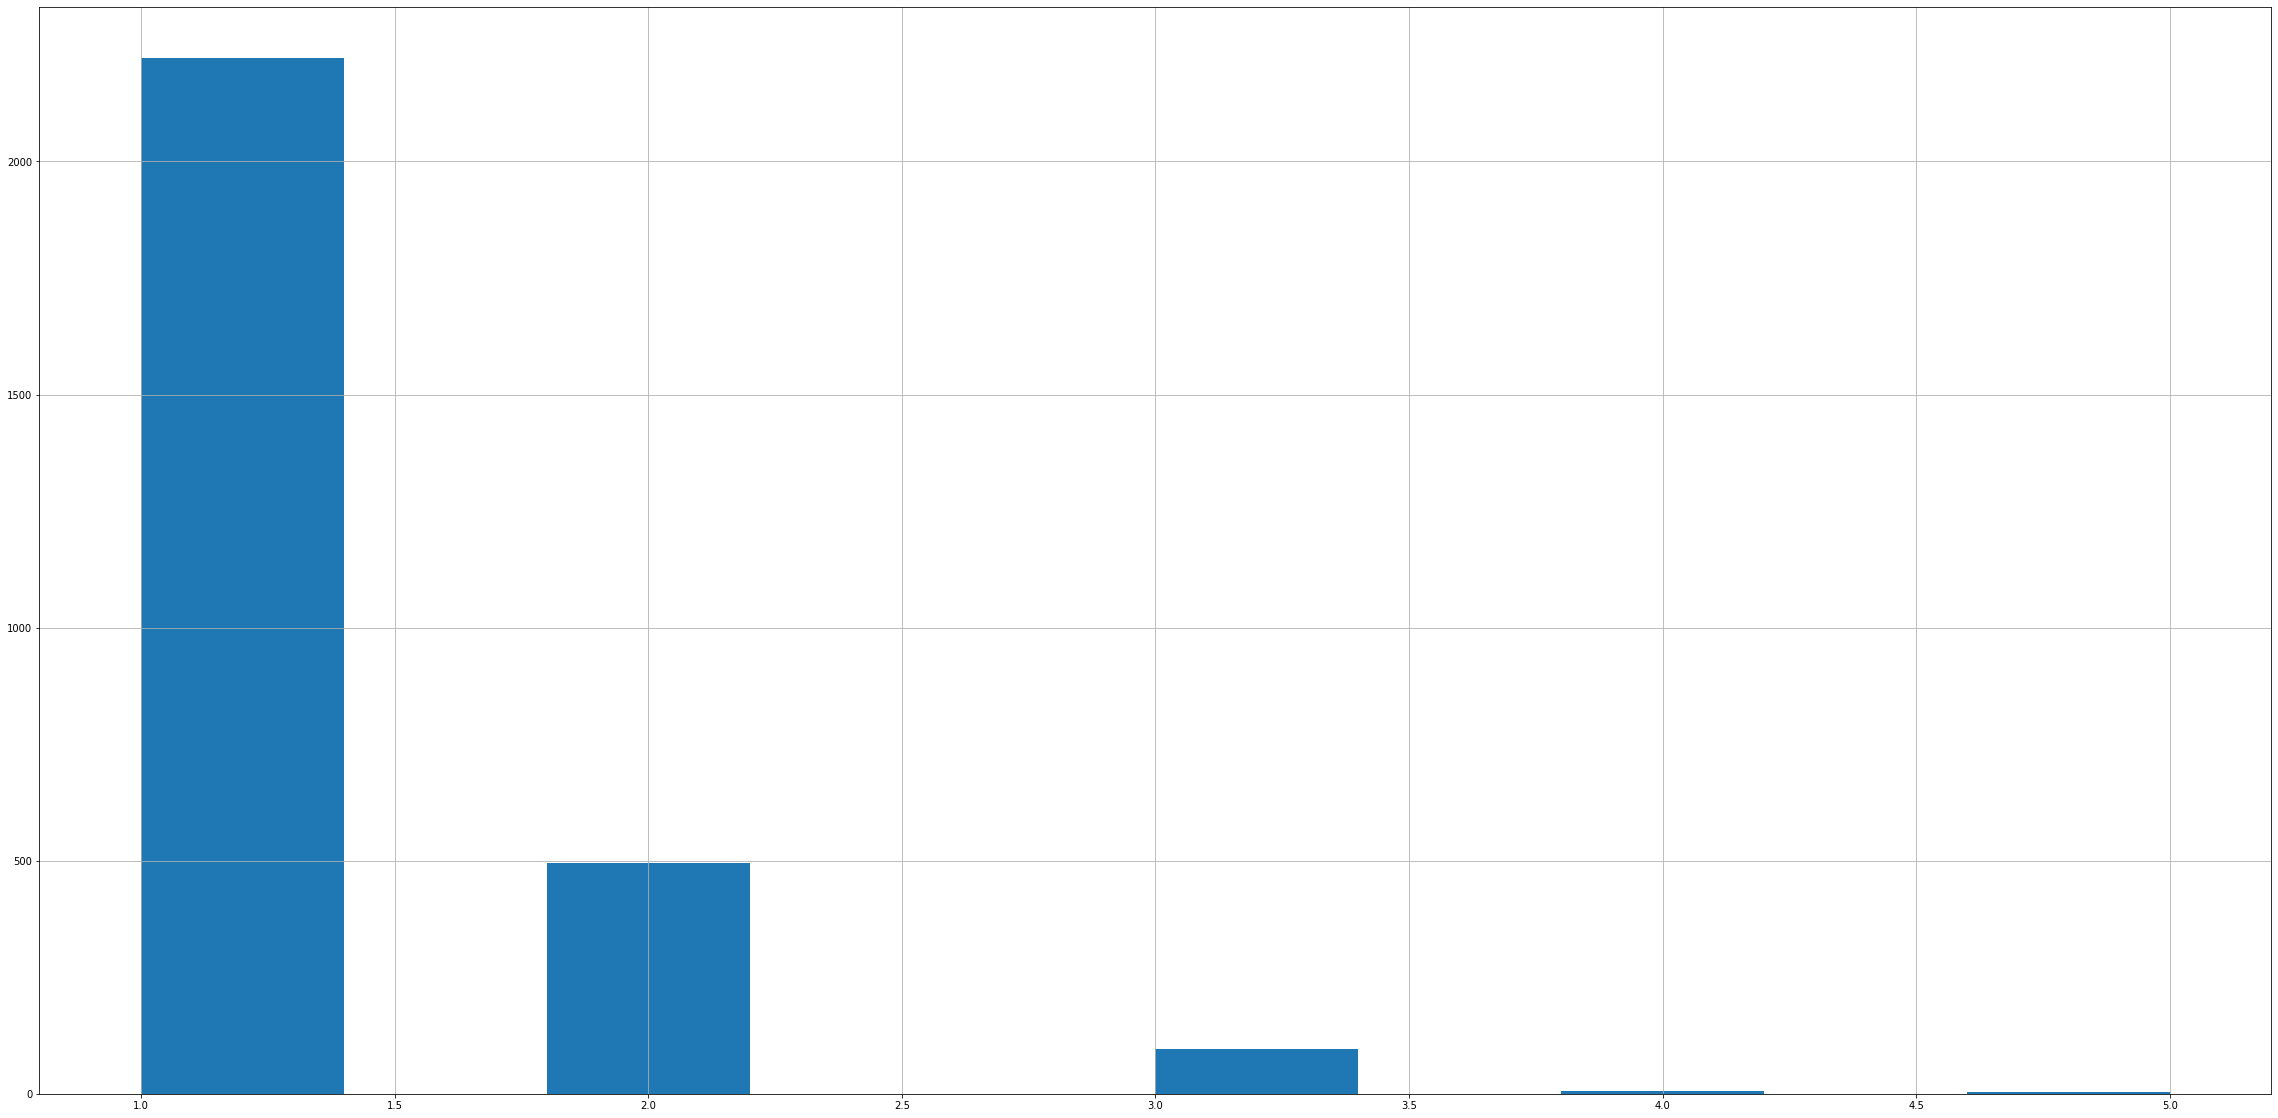

In [ ]:
print(meta_cleaned['reviews'].map(len).value_counts())
meta_cleaned['reviews'].map(len).value_counts().hist(figsize = (40,20))

In [ ]:
meta_cleaned.to_csv('2022-11-20movie_with_metacritic_reviews_cleaned.csv', index=False)

#Join Cleaned data and extra information dataset

In [41]:
cleaned_data = pd.read_csv('2022-11-20movie_with_metacritic_reviews_cleaned.csv')
extra_data = pd.read_csv('tmdb_5000_movies.csv')
extra_data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [42]:
extra_data = extra_data.rename(columns = {'id':"movie_id"})
extra_data.head(2)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [43]:
cleaned_full_df = pd.merge(cleaned_data, extra_data, on = 'movie_id')
cleaned_full_df.head(5)

,movie_id,title_x,cast,crew,reviews,budget,genres,homepage,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",['At the end of a decade defined by much belly...,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",['One of the great satisfactions of Spectre is...,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
2,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","['A cinematic, cultural and personal triumph, ...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
3,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",['The achievement of John Carter is that it ta...,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
4,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[""With nifty new villains, a revived Green Gob...",258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576


In [44]:
cleaned_full_df.columns

Index(['movie_id', 'title_x', 'cast', 'crew', 'reviews', 'budget', 'genres',
       'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_y', 'vote_average',
       'vote_count'],
      dtype='object')

In [45]:
cleaned_full_df.drop(columns = ['budget', 'homepage', 'original_language', 'original_title', 'popularity', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title_y', 'vote_average','vote_count'], inplace = True)
print(cleaned_full_df.info())
cleaned_full_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3535
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_id              3536 non-null   int64 
 1   title_x               3536 non-null   object
 2   cast                  3536 non-null   object
 3   crew                  3536 non-null   object
 4   reviews               3536 non-null   object
 5   genres                3536 non-null   object
 6   keywords              3536 non-null   object
 7   overview              3535 non-null   object
 8   production_companies  3536 non-null   object
 9   production_countries  3536 non-null   object
 10  release_date          3536 non-null   object
dtypes: int64(1), object(10)
memory usage: 331.5+ KB
None


,movie_id,title_x,cast,crew,reviews,genres,keywords,overview,production_companies,production_countries,release_date
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",['At the end of a decade defined by much belly...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10
1,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",['One of the great satisfactions of Spectre is...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26
2,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","['A cinematic, cultural and personal triumph, ...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16
3,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",['The achievement of John Carter is that it ta...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07
4,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[""With nifty new villains, a revived Green Gob...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",The seemingly invincible Spider-Man goes up ag...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01


In [46]:
cleaned_full_df.to_csv('Cleaned_full_tmdb_5000.csv')